In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
import os

# Define the path to your folder in Google Drive
folder_path = "/content/drive/MyDrive/Car_dataset_final"

# Define the directory where you want to extract the contents
extract_dir = "/content/drive/MyDrive/Output_car_folder"

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Copy the contents of the folder to the extraction directory
shutil.copytree(folder_path, extract_dir)

print("Folder contents copied to extraction directory.")



FileExistsError: [Errno 17] File exists: '/content/drive/MyDrive/Output_car_folder'

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Car_dataset_final/Train'
valid_path = '/content/drive/MyDrive/Car_dataset_final/Test'

In [3]:
#re-size all the images to a particular format

IMAGE_SIZE = [224,224]
#here 224,224 is the width and the height.

In [4]:
import os

# Specify the path
dataset_path = '/content/drive/MyDrive/Car_dataset_final'

# List all directories (folders) in the specified path
folders = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]

# Print the total number of folders
print("Total number of folders:", len(folders))

Total number of folders: 2


In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [6]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [7]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [8]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Car_dataset_final/Train')

In [11]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [13]:
 # useful for getting number of output classes
import os
from glob import glob

# Specify the directory containing the folders
directory = '/content/drive/MyDrive/Car_dataset_final/Train'

# Use glob to get all subdirectories inside the specified directory
folders = glob(os.path.join(directory, '*'))

# Check the number of folders found
print("Number of folders:", len(folders))

# Now folders contains a list of paths to all the subdirectories inside the specified directory

Number of folders: 3


In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Car_dataset_final/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Car_dataset_final/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
2/2 [==============================] - 48s 25s/step - loss: 5.9937 - accuracy: 0.2812 - val_loss: 7.8149 - val_accuracy: 0.5345
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 8.7080 - accuracy: 0.3281 - val_loss: 3.0917 - val_accuracy: 0.5172
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 2.6049 - accuracy: 0.3281 - val_loss: 4.0592 - val_accuracy: 0.3276
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 3.3387 - accuracy: 0.3906 - val_loss: 1.0837 - val_accuracy: 0.5862
Epoch 5/20
2/2 [==============================] - 1s 816ms/step - loss: 1.3056 - accuracy: 0.5469 - val_loss: 2.9848 - val_accuracy: 0.1724
Epoch 6/20
2/2 [==============================] - 1s 800ms/step - loss: 2.2729 - accuracy: 0.4219 - val_loss: 1.4386 - val_accuracy: 0.5517
Epoch 7/20
2/2 [==============================] - 1s 812ms/step - loss: 0.9367 - accuracy: 0.6719 - val_loss: 2.3362 - val_accuracy: 0.3276
Epoch 8/20
2/2 [==============

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 50

# Define optimizer
optimizer = Adam(lr=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Fit the model with tuned hyperparameters
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=epochs,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    batch_size=batch_size,
    # callbacks=[early_stopping]
)


Epoch 1/50
2/2 [==============================] - 7s 2s/step - loss: 6.0840 - accuracy: 0.6250 - val_loss: 4.8197 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 829ms/step - loss: 3.8229 - accuracy: 0.4062 - val_loss: 6.8838 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 1s 849ms/step - loss: 6.8577 - accuracy: 0.4844 - val_loss: 6.6475 - val_accuracy: 0.3966
Epoch 4/50
2/2 [==============================] - 1s 836ms/step - loss: 5.4380 - accuracy: 0.5938 - val_loss: 2.6032 - val_accuracy: 0.5345
Epoch 5/50
2/2 [==============================] - 1s 823ms/step - loss: 1.1979 - accuracy: 0.7656 - val_loss: 4.2711 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 3.8378 - accuracy: 0.3906 - val_loss: 4.3213 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 1s 800ms/step - loss: 1.6317 - accuracy: 0.6250 - val_loss: 1.4314 - val_accuracy: 0.6034
Epoch 8/50
2/2 [==========

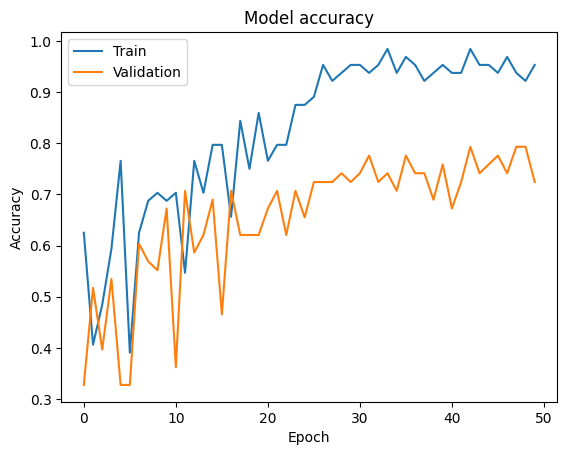

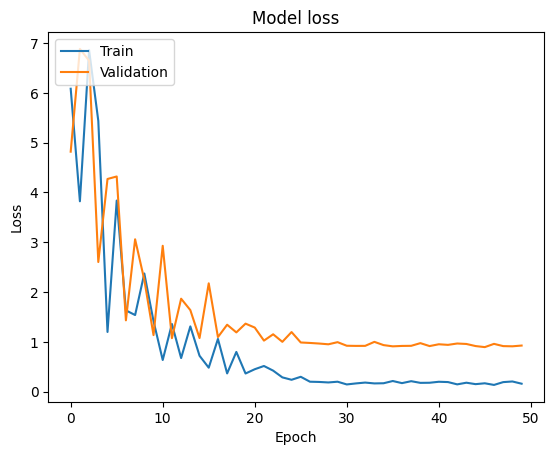

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [23]:
#saving the file as the h5 file.

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
y_pred = model.predict(test_set)

2/2 [==============================] - 2s 126ms/step


In [25]:
y_pred

array([[9.60590363e-01, 2.76133567e-02, 1.17962770e-02],
       [1.26043055e-02, 8.34523857e-01, 1.52871847e-01],
       [2.16094926e-01, 6.01646602e-01, 1.82258472e-01],
       [2.46293582e-02, 4.88003977e-02, 9.26570237e-01],
       [5.01860806e-04, 9.95304942e-01, 4.19324823e-03],
       [5.61886206e-02, 2.99679071e-01, 6.44132316e-01],
       [1.34627712e-07, 4.99733942e-05, 9.99949932e-01],
       [2.06872616e-02, 3.92044603e-04, 9.78920639e-01],
       [9.12947766e-03, 9.75732088e-01, 1.51384557e-02],
       [5.45974215e-03, 7.35504262e-04, 9.93804812e-01],
       [2.98077464e-02, 5.21166444e-01, 4.49025780e-01],
       [8.61859262e-01, 1.37220681e-01, 9.20087798e-04],
       [6.66254014e-03, 6.36663914e-01, 3.56673539e-01],
       [1.66606933e-01, 4.93416697e-01, 3.39976341e-01],
       [6.25074563e-07, 1.67662183e-05, 9.99982595e-01],
       [1.83853146e-03, 9.91224825e-01, 6.93668285e-03],
       [1.44577418e-02, 9.14244354e-01, 7.12979436e-02],
       [1.15191294e-02, 5.25218

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1) # converting all the classes into 0,1,2.

In [27]:
y_pred

array([0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2])

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
from tensorflow.keras.models import load_model

model = load_model('model_resnet50.h5')


In [30]:
extract_dir

NameError: name 'extract_dir' is not defined

In [32]:
img=image.load_img('/content/drive/MyDrive/Car_dataset_final/Test/audi/28.jpg',target_size=(224,224))

In [33]:
x=image.img_to_array(img) #converting into the image array!
x

array([[[205., 215., 240.],
        [205., 215., 240.],
        [205., 215., 240.],
        ...,
        [ 67.,  96., 128.],
        [ 67.,  96., 128.],
        [ 66.,  95., 127.]],

       [[205., 215., 240.],
        [205., 215., 240.],
        [205., 215., 240.],
        ...,
        [ 66.,  95., 127.],
        [ 66.,  95., 127.],
        [ 65.,  94., 126.]],

       [[205., 215., 240.],
        [205., 215., 240.],
        [205., 215., 240.],
        ...,
        [ 66.,  95., 127.],
        [ 66.,  95., 127.],
        [ 65.,  94., 126.]],

       ...,

       [[ 82.,  85.,  92.],
        [ 82.,  85.,  92.],
        [ 83.,  86.,  93.],
        ...,
        [ 76.,  79.,  86.],
        [ 76.,  79.,  86.],
        [ 75.,  78.,  85.]],

       [[ 82.,  85.,  92.],
        [ 82.,  85.,  92.],
        [ 83.,  86.,  93.],
        ...,
        [ 76.,  79.,  86.],
        [ 76.,  79.,  86.],
        [ 75.,  78.,  85.]],

       [[ 85.,  88.,  95.],
        [ 86.,  89.,  96.],
        [ 86.,  

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
x  #now for this x we are going to do the predicition!

array([[[0.8039216 , 0.84313726, 0.9411765 ],
        [0.8039216 , 0.84313726, 0.9411765 ],
        [0.8039216 , 0.84313726, 0.9411765 ],
        ...,
        [0.2627451 , 0.3764706 , 0.5019608 ],
        [0.2627451 , 0.3764706 , 0.5019608 ],
        [0.25882354, 0.37254903, 0.49803922]],

       [[0.8039216 , 0.84313726, 0.9411765 ],
        [0.8039216 , 0.84313726, 0.9411765 ],
        [0.8039216 , 0.84313726, 0.9411765 ],
        ...,
        [0.25882354, 0.37254903, 0.49803922],
        [0.25882354, 0.37254903, 0.49803922],
        [0.25490198, 0.36862746, 0.49411765]],

       [[0.8039216 , 0.84313726, 0.9411765 ],
        [0.8039216 , 0.84313726, 0.9411765 ],
        [0.8039216 , 0.84313726, 0.9411765 ],
        ...,
        [0.25882354, 0.37254903, 0.49803922],
        [0.25882354, 0.37254903, 0.49803922],
        [0.25490198, 0.36862746, 0.49411765]],

       ...,

       [[0.32156864, 0.33333334, 0.36078432],
        [0.32156864, 0.33333334, 0.36078432],
        [0.3254902 , 0

In [37]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [38]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[2.8591798e-04, 2.4981042e-03, 9.9721599e-01]], dtype=float32)

In [39]:
a=np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 24ms/step


In [40]:
a #this value of a is used to determine the car model!

array([2])